In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
# Load the data
data = pd.read_csv('data-1725637697390.csv')

# Get column headers
print("Column headers:")
print(data.columns.tolist())

# View first 5 rows
print("\nFirst 5 rows:")
print(data.head())



Column headers:
['first_name', 'last_name', 'hotel_id', 'room_id', 'created_date', 'check_in', 'check_out', 'cancel_date', 'booking_reference', 'lead_in', 'booking_channel_name', 'booking_status', 'adults', 'rate_plan_code', 'nights', 'room_revenue', 'total_revenue_x', 'exp_rate', 'total_revenue_after_tax', 'hotel_name', 'room_name', 'room_code', 'stay_date', 'refundable_rate', 'non_refundable_rate', 'hotel_id-2', 'report_date', 'stay_date-2', 'room_name-2', 'adultcount']

First 5 rows:
  first_name last_name  hotel_id  room_id created_date    check_in  \
0       Yana   Mertens         6      127   2022-05-04  2022-05-08   
1     Denise  Martinez         6      125   2022-05-14  2022-05-16   
2    Andreas   Riegler         6      126   2022-05-19  2022-05-23   
3      Steve   Goodwin         6      127   2022-05-25  2022-05-26   
4    Jerneva    Cowell         6      124   2022-05-30  2022-06-02   

    check_out cancel_date  booking_reference  lead_in  ...  \
0  2022-05-09         NaN

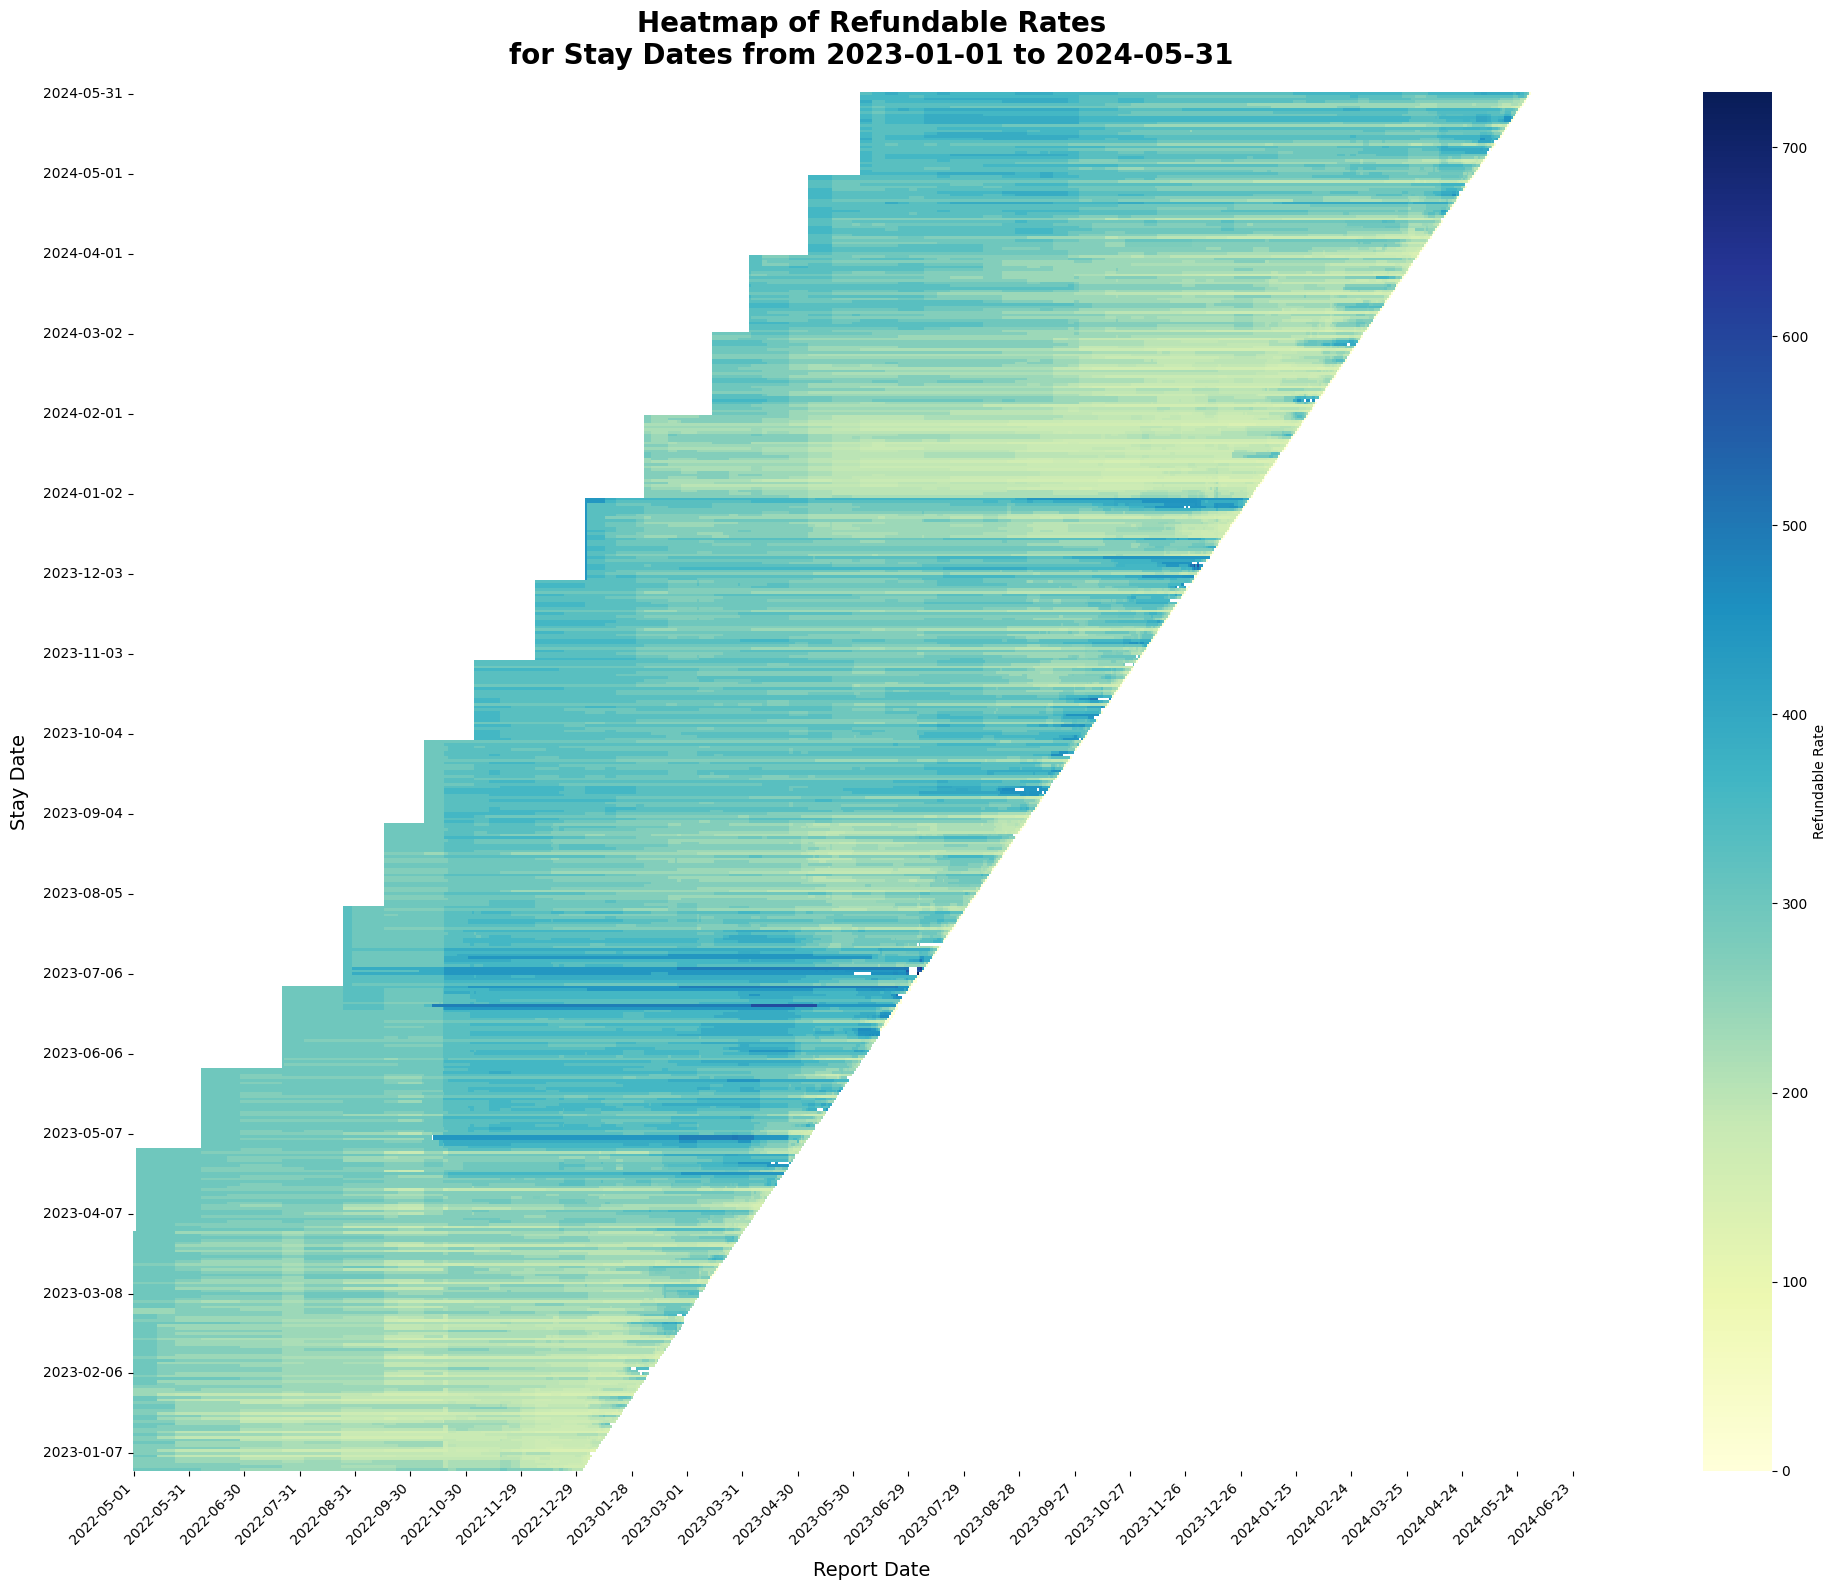

In [32]:
# Load the data
data = pd.read_csv('data-1725876476777.csv')

# Convert 'report_date' and 'stay_date' to datetime and then to date
data['report_date'] = pd.to_datetime(data['report_date']).dt.date
data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date

# Create a pivot table
pivot_data = data.pivot_table(values='refundable_rate', index='report_date', columns='stay_date', aggfunc='sum')

# Sort the index (report_date) and columns (stay_date)
pivot_data = pivot_data.sort_index()
pivot_data = pivot_data.reindex(columns=sorted(pivot_data.columns))

# Extended date range
start_date = pd.to_datetime('2023-01-01').date() # Start of the range
end_date = pd.to_datetime('2024-05-31').date() # End of the range

# Select the date range
date_range = pd.date_range(start=start_date, end=end_date).date
filtered_data = pivot_data.loc[:, pivot_data.columns.isin(date_range)]

# Check if the filtered data is not empty
if not filtered_data.empty:
    # Set up the plot style
    plt.style.use('default')
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Reverse the order of the stay dates (y-axis)
    stay_dates = filtered_data.columns[::-1]
    
    # Create the heatmap using seaborn
    sns.heatmap(
        filtered_data.T.loc[stay_dates],
        cmap='YlGnBu',
        annot=False,
        fmt='.0f',
        cbar_kws={'label': 'Refundable Rate'},
        yticklabels=30,  # Show every 30th label
        xticklabels=30,  # Show every 30th label
        ax=ax
    )
    
    # Set title and labels
    ax.set_title(f'Heatmap of Refundable Rates\nfor Stay Dates from {start_date} to {end_date}', 
                 fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('Report Date', fontsize=14, labelpad=10)
    ax.set_ylabel('Stay Date', fontsize=14, labelpad=10)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Remove gridlines
    ax.grid(False)
    
    # Adjust layout and display the plot         
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for stay dates from {start_date} to {end_date}.")



In [28]:
# Create a new column with adjusted exp_rate
data['total_revenue_x'] = (data['total_revenue_x']).round()
data['discounted_rate_with_tax'] = (data['exp_rate'] * (1.2 / 0.9)).round()
data['double_discounted_rate_with_tax'] = (data['exp_rate'] * (1.2 / 0.81)).round()

# View the first 5 rows of the updated dataframe
print("First 5 rows with new column:")
print(data[['total_revenue_x', 'total_revenue_after_tax', 'discounted_rate_with_tax', 'double_discounted_rate_with_tax', 'refundable_rate']].head(10))

First 5 rows with new column:
   total_revenue_x  total_revenue_after_tax  discounted_rate_with_tax  \
0            142.0                   170.54                     228.0   
1              0.0                     0.00                       0.0   
2            337.0                   404.09                     539.0   
3            250.0                   299.50                     399.0   
4            241.0                   289.49                     385.0   
5            141.0                   169.69                     227.0   
6            250.0                   299.50                     399.0   
7            258.0                   309.49                     412.0   
8              0.0                     0.00                       0.0   
9            333.0                   399.49                     532.0   

   double_discounted_rate_with_tax  refundable_rate  
0                            253.0            209.0  
1                              0.0            269.0  
2   

In [31]:
# Assuming 'data' is your DataFrame
matching_rows = data[
    (data['refundable_rate'] == data['total_revenue_after_tax']) |
    (data['refundable_rate'] == data['discounted_rate_with_tax']) | 
    (data['refundable_rate'] == data['double_discounted_rate_with_tax'])
]


In [32]:
def ends_with_9(x):
    return str(x).endswith('9')

# Apply the function to the relevant columns and create the 'potential_upgrades' column
#note | indicated elementwise OR operation
data['potential_upgrades'] = (
    data['total_revenue_after_tax'].apply(ends_with_9) |
    data['discounted_rate_with_tax'].apply(ends_with_9) |
    data['double_discounted_rate_with_tax'].apply(ends_with_9)
)

# Count the number of Trues and Falses
true_count = data['potential_upgrades'].sum()
false_count = len(data) - true_count
total_data_points = len(data)

# Report the results
print(f"Number of True values: {true_count}")
print(f"Number of False values: {false_count}")
print(f"Total number of data points: {total_data_points}")

# Display the updated DataFrame
print(data)

Number of True values: 62
Number of False values: 151
Total number of data points: 213
    first_name  last_name  hotel_id  room_id created_date    check_in  \
0         Yana    Mertens         6      127   2022-05-04  2022-05-08   
1       Denise   Martinez         6      125   2022-05-14  2022-05-16   
2      Andreas    Riegler         6      126   2022-05-19  2022-05-23   
3        Steve    Goodwin         6      127   2022-05-25  2022-05-26   
4      Jerneva     Cowell         6      124   2022-05-30  2022-06-02   
..         ...        ...       ...      ...          ...         ...   
208     Lauren  Dorricott         6      127   2024-06-28  2024-06-29   
209        NaN      harry         6      127   2024-06-29  2024-06-30   
210      Dylan    Lallier         6      127   2024-06-29  2024-06-30   
211    Charles      Angus         6      128   2024-07-01  2024-07-04   
212      Julie     Doerge         6      127   2024-07-12  2024-10-04   

      check_out cancel_date  booking